In [8]:
!pip install markupsafe==2.0.1

In [12]:
# Loading and Exploring the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
df_1 = pd.read_csv("insurance.csv")
df_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df_1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
df_1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:ylabel='bmi'>

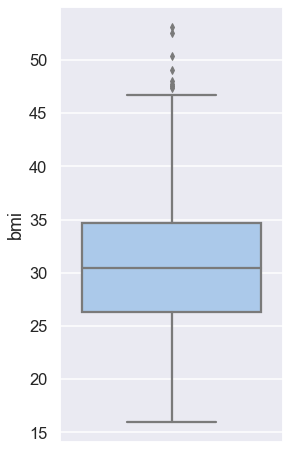

In [40]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.bmi)

In [41]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [43]:
out_iqr(df_1,'bmi')
#Input the dataset and the required column

The IQR is 8.3975
The lower bound value is 13.7
The upper bound value is 47.290000000000006
Total number of outliers are 9


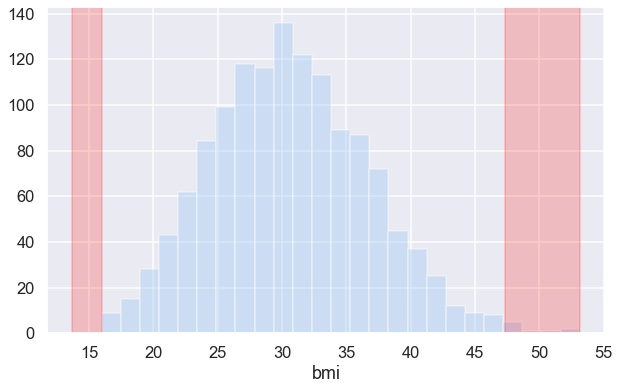

In [45]:
plt.figure(figsize = (10,6))
sns.distplot(df_1.bmi, kde=False)
plt.axvspan(xmin = lower,xmax= df_1.bmi.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_1.bmi.max(),alpha=0.2, color='red')

In [46]:
#Data Frame without outliers
df_new = df_1[(df_1['bmi'] < upper) | (df_1['bmi'] > lower)]

In [47]:
df_2 = pd.read_csv("insurance.csv")
df_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='charges', ylabel='Density'>

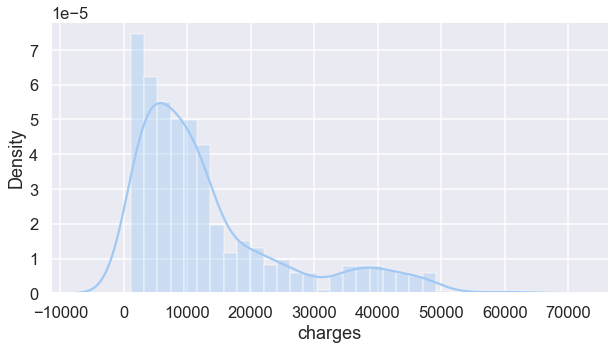

In [51]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['charges'])

In [52]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [53]:
out_std(df_2,'charges')

The lower bound value is -23059.611444940725
The upper bound value is 49600.45597522324
Total number of outliers are 7


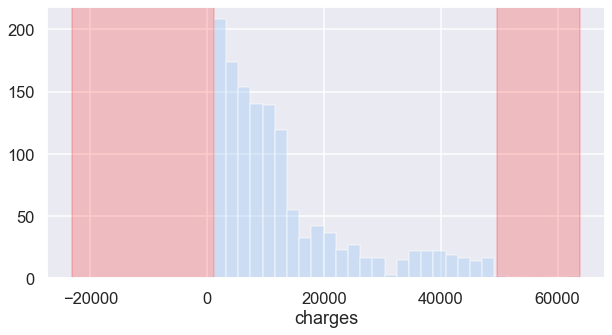

In [54]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['charges'], kde=False)
plt.axvspan(xmin = lower,xmax= df_2['charges'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_2['charges'].max(),alpha=0.2, color='red')

In [55]:
#Data Frame without outliers
df_new = df_2[(df_2['charges'] < upper) | (df_2['charges'] > lower)]

In [56]:
df_3 = pd.read_csv("insurance.csv")
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
df_3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
df_3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [60]:
out_zscore(df_3.charges)

Total number of outliers are 7


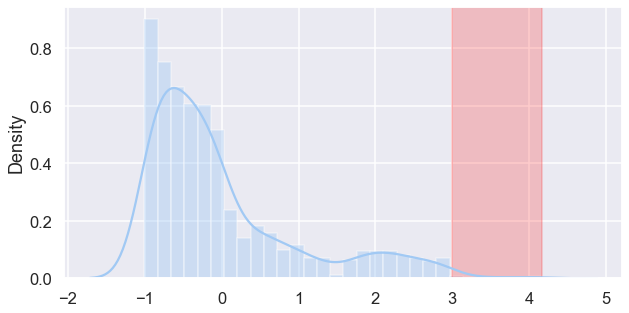

In [61]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

In [62]:
#Data Frame without outliers
df_new = df_3[(df_3['charges'] < 3) | (df_3['charges'] > -3)]

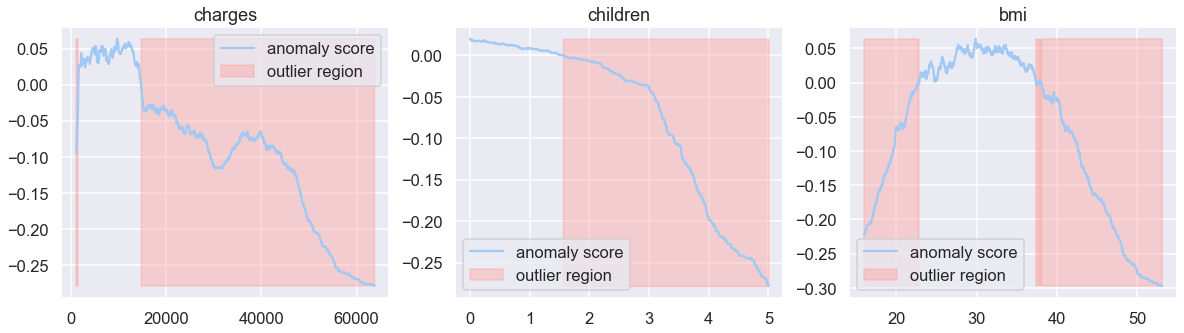

In [63]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
cols = ['charges','children','bmi']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df_2[column].values.reshape(-1,1))

    xx = np.linspace(df_2[column].min(), df_2[column].max(), len(df_2)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [64]:
X = df_3[['age','bmi']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [65]:
pd.Series(labels).value_counts()

 0    1312
-1      26
dtype: int64

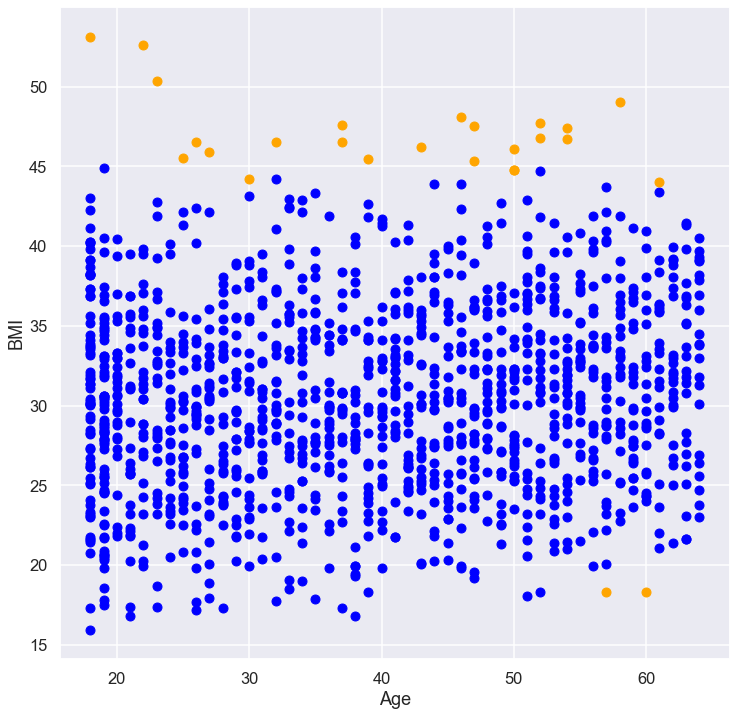

In [66]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'orange']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Age');
plt.ylabel('BMI');

In [67]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df_1[['age','bmi']].values
y_pred = clf.fit_predict(X)

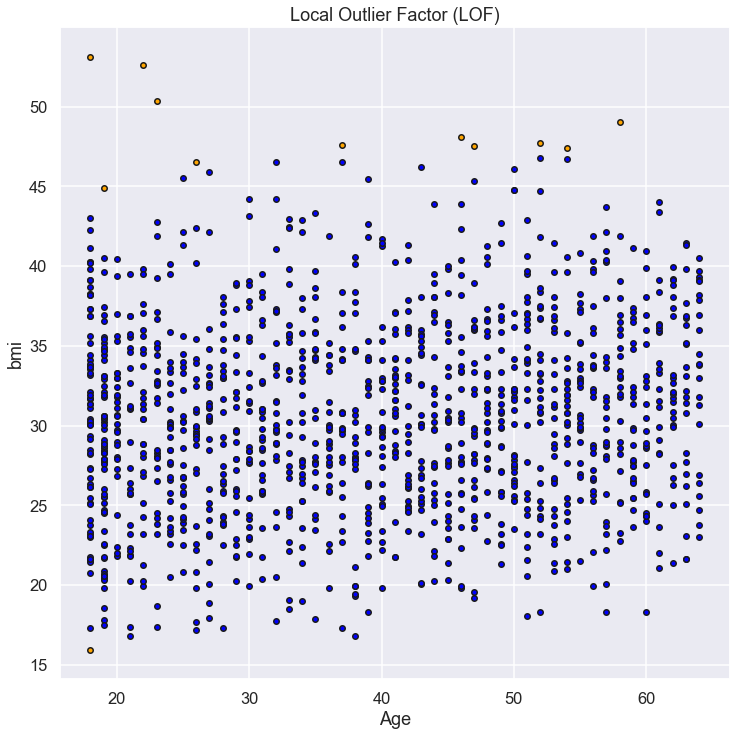

In [75]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'orange',
                edgecolor = 'k', s = 30)
plt.xlabel('Age');
plt.ylabel('bmi');
plt.show()